In [2]:
#Necessary imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline 

In [3]:
#Load numpy archives from data directory 
data = []
for i in os.listdir("data"):
    data.append(np.load(f"data/{i}").reshape((-1, 28, 28)))

In [4]:
#Create training and testing dataset
CATEGORIES = ["alarm clock", "hand", "sun", "tooth", "tree"]
training = []
testing = []

for c, i in enumerate(data):
    for j in i[:len(i) // 2]:
        training.append([j, c])
    for j in i[len(i) // 2:]:
        testing.append([j, c])

In [5]:
#Shuffle dataset
import random
random.shuffle(training)

In [6]:
#Turn training dataset into labelled numpy arrays
x_train, y_train = [], []

for i, l in training:
    x_train.append(i)
    y_train.append(l)
    
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
y_train = np.array(y_train)

In [27]:
#Create model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 2)
#possibly change optimiser to tf.keras.optimizers.SGD(), loss = 'mse'
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(790, activation="relu"),
    tf.keras.layers.Dense(784, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation="relu"),
    tf.keras.layers.Dense(784, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
        ])
  
model.compile(optimizer="adam",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"])


In [28]:
#Train model
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Epoch 1/10
12793/12793 [==============================] - 228s 18ms/step - loss: 0.4005 - accuracy: 0.8882
Epoch 2/10
12793/12793 [==============================] - 200s 16ms/step - loss: 0.2404 - accuracy: 0.9240
Epoch 3/10
12793/12793 [==============================] - 199s 16ms/step - loss: 0.2119 - accuracy: 0.9339
Epoch 4/10
12793/12793 [==============================] - 943s 74ms/step - loss: 0.1968 - accuracy: 0.9392
Epoch 5/10
12793/12793 [==============================] - 198s 15ms/step - loss: 0.1825 - accuracy: 0.9428
Epoch 6/10
12793/12793 [==============================] - 198s 15ms/step - loss: 0.1763 - accuracy: 0.9464
Epoch 7/10
12793/12793 [==============================] - 198s 15ms/step - loss: 0.1679 - accuracy: 0.9492
Epoch 8/10
12793/12793 [==============================] - 198s 15ms/step - loss: 0.1615 - accuracy: 0.9513
Epoch 9/10
12793/12793 [==============================] - 16697s 1s/step - loss: 0.1586 - accuracy: 0.9533
Epoch 10/10
12793/12793 [============

In [29]:
#Create testing dataset
x_test, y_test = [], []

random.shuffle(testing)

for i, l in testing:
    x_test.append(i)
    y_test.append(l)
    
x_test = np.array(x_test).reshape((-1, 28, 28, 1))
y_test = np.array(y_test)

In [30]:
#Check model performance on testing dataset
model.evaluate(x_test, y_test)

12793/12793 [==============================] - 53s 4ms/step - loss: 0.2547 - accuracy: 0.9432


[0.25465092062950134, 0.9431933164596558]

In [22]:
#See network perform on specific data
predictions = model.predict(x_test[:100])
print(predictions)

[[4.87226134e-06 1.62885757e-04 5.69468341e-07 1.45201066e-05
  9.99817193e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.22059438e-09 9.99904990e-01 2.02534864e-12 5.00170785e-08
  9.50575632e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.90262905e-14 9.99999046e-01 1.18811994e-18 8.31563898e-12
  9.44699138e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.05118030e-01 3.21584046e-01 2.25936130e-01 1.50407732e-01
  9.69518945e-02 7.31744819e-07 3.58345631e-07 3.56265332e-07
  2.95900151e-07 3.91677759e-07]
 [1.08208545e-01 6.16717786e-02 7.39593565e-01 7.37351179e-02
  1.67910028e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.04496968e-01 1.24175986e-02 9.42220259e-03 7.15267956e-02
  2.13629589e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e

Network guess: sun
Actual truth: sun


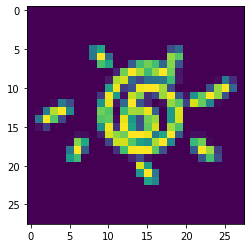

In [15]:
#Run this cell to see a random element of the testing set and  model prediction
sample = random.randint(0, 99)

print(f"Network guess: {CATEGORIES[np.argmax(predictions[sample])]}")
print(f"Actual truth: {CATEGORIES[y_test[sample]]}")

plt.imshow(x_test[sample])

NameError: name 'plot_image' is not defined

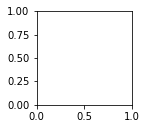